In [129]:
load('OneGinormousFile.pyx')

Compiling ./OneGinormousFile.pyx...


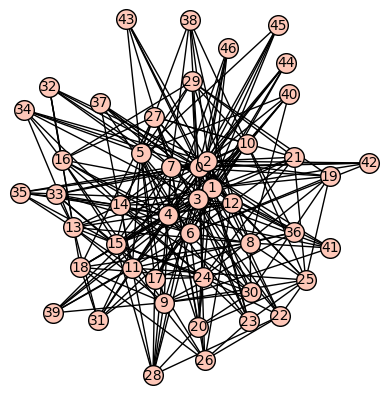

In [130]:
# Initialize a test graph and the associated ZFSearchMetagraph
#H = graphs.CubeGraph(5); H.relabel()
#H = graphs.CoxeterGraph()       # DNF/DNF/1,284sec/339sec/220sec
#H = graphs.RobertsonGraph()     # DNF
#H = graphs.HeawoodGraph()       # 1.46/~1.20sec/1.03sec/0.22sec/0.16sec/0.12sec
#H = graphs.BrinkmannGraph()     # DNF/DNF/66.5sec/43.3sec/29.81sec/25.97sec
#H = graphs.HoffmanGraph()       # ~19sec/~13.7sec/2.57sec/2.00sec/1.6sec
#H = graphs.ClebschGraph()       # DNF/36.3sec/12.8sec/7.8sec/6.7sec/4.8sec/4.22sec/2.90sec
#H = graphs.DesarguesGraph()     # 14.56sec/8.00sec/5.6sec
#H = graphs.DodecahedralGraph()  # ~25.9sec/~8.9sec/~4.2sec/3.02sec/2.90sec/2.12sec/1.07sec/0.80sec
#H = graphs.HoffmanGraph().complement()
#H = graphs.CompleteGraph(16)
#H = graphs.RandomTree(22)
#H = graphs.PathGraph(30)
#H = graphs.StarGraph(4)
#H = graphs.ClebschGraph().line_graph()
#H = graphs.BrinkmannGraph().line_graph()
#H = graphs.RobertsonGraph().line_graph()
#H = graphs.CoxeterGraph().line_graph()
H = graphs.MycielskiGraph(6)
#H = graphs.PaleyGraph(17).line_graph()
#H = graphs.PaleyGraph(73)
#H = graphs.PaleyGraph(17)
H.relabel()

#d = {0: [1,2,4], 1: [0,2,5], 2: [0,1,3], 3: [2,4,5], 4: [0,3,5], 5: [1,3,4]}
#H = Graph(d)

if H.num_verts() < 70:
    H.show()

#metaGraph = ZFSearchMetagraphNewAlg(H)
#%time calculate_all_closures(H)

In [131]:
metaGraph = ZFSearchMetagraphNewAlg(H)
#metaGraph = ZFSearchMetagraph(H)
print "\n"
print "This graph has", H.num_verts(), "vertices"
all_unfilled = frozenset([])
all_filled = frozenset(range(H.num_verts()))

%time output = dijkstra(metaGraph, all_unfilled, all_filled)

print " "
print "Zero forcing number:", len(output)
print "Zero forcing set:   ", set(output)
print "Closures calculated:", metaGraph.get_num_closures_calculated()



This graph has 47 vertices
Closures remaining on queue:                 15157300
Length of shortest path found in metagraph:  6
CPU times: user 19 s, sys: 1.71 s, total: 20.8 s
Wall time: 20.8 s
 
Zero forcing number: 20
Zero forcing set:    set([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 16, 18, 21, 24, 26, 27, 31, 37, 39, 46])
Closures calculated: 2673823


In [38]:
load("Sandbox/bitset_sizes.pyx")

In [13]:
list([])

[]

In [14]:
a = [1,2,3,4,5]

In [15]:
print a.pop()

5


In [16]:
a

[1, 2, 3, 4]

In [17]:
a.pop()

4

In [18]:
a

[1, 2, 3]

In [20]:
a.append(19)

In [56]:
a = (1,2)

In [58]:
type(a)

<type 'tuple'>

In [83]:
H  = graphs.PaleyGraph(17).line_graph()


In [84]:
H.num_verts()

68

In [87]:
H.relabel()

In [96]:
sorted(H.neighbors(1) + [999])

[0, 2, 3, 4, 5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 999]

In [92]:
my_list = []

In [95]:
my_list.append(1)